In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset
file = 'airbnb.xlsx'

# assign dataset to a variable
pd.set_option('display.max_columns', 100)
df = pd.read_excel(file)

# view first 20 rows of the dataset
df.head(20)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,2008-08-20,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


#### sampling out test set from the data set to reduce risk of data leakage

In [4]:
# import relevant library
from sklearn.model_selection import train_test_split

# set random seed
seed = 234

# split out the test and train sets from the data
Train, Test = train_test_split(df, test_size=.33, random_state=seed)

In [6]:
# save Test set to local machine
Test.to_csv('airbnbTest.csv')

In [8]:
# save Train set to local machine
Train.to_csv('airbnbTrain.csv')

In [21]:
# analyse the percentage missing values of each variable
df.isnull().mean()

Host Id                       0.000000
Host Since                    0.000098
Name                          0.000000
Neighbourhood                 0.000000
Property Type                 0.000098
Review Scores Rating (bin)    0.273082
Room Type                     0.000000
Zipcode                       0.004397
Beds                          0.002789
Number of Records             0.000000
Number Of Reviews             0.000000
Price                         0.000000
Review Scores Rating          0.273082
dtype: float64

In [17]:
len(df)

30478

In [12]:
# Analyse descriptive stats of numerical variables
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000


#### visualise distribution of each numerical variable using histogram

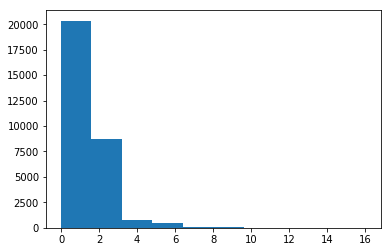

In [57]:
# the distribution of beds. Plotted with plt so as not to tamper with the missing values yet
plt.hist(df['Beds'])
plt.show()

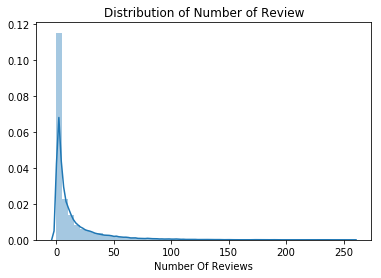

In [56]:
# the distribution of Number Of Reviews
sns.distplot(df['Number Of Reviews'], kde=True).set_title('Distribution of Number of Review')
plt.show()

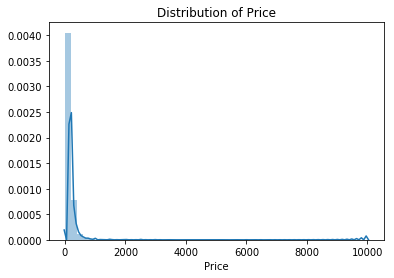

In [72]:
# the distribution of Price
#plt.hist(df['Price'])
sns.distplot(df['Price'], kde=True).set_title('Distribution of Price')
plt.show()

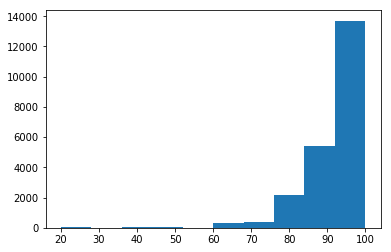

In [49]:
# the distribution of Review Scores Rating
plt.hist(df['Review Scores Rating'])
plt.show()

### Let's Use Boxplot

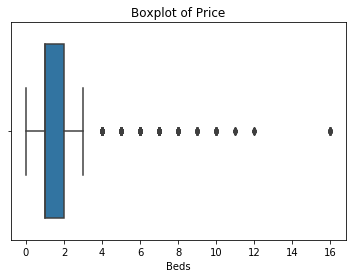

In [51]:
# the distribution of Price
sns.boxplot(df['Beds']).set_title('Boxplot of Price')
plt.show()

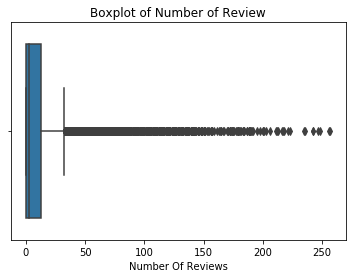

In [48]:
# the distribution of Number Of Reviews
sns.boxplot(df['Number Of Reviews']).set_title('Boxplot of Number of Review')
plt.show()

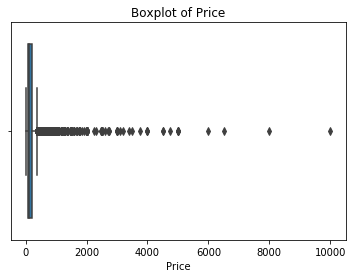

In [50]:
# the distribution of Price
sns.boxplot(df['Price']).set_title('Boxplot of Price')
plt.show()

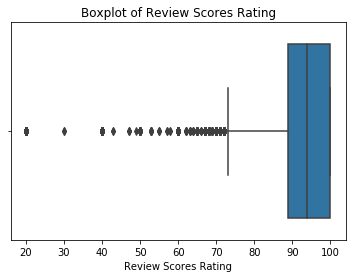

In [55]:
# the distribution of Review Scores Rating
sns.boxplot(df['Review Scores Rating']).set_title('Boxplot of Review Scores Rating')
plt.show()

#### Faceting Price with some categorical variables.

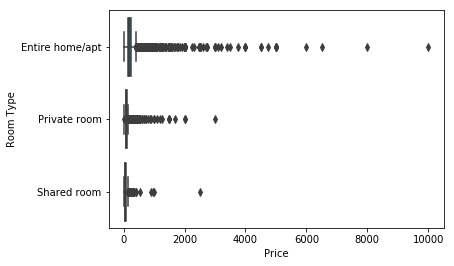

In [58]:
# Faceting Price and Room Type
sns.boxplot(df['Price'], df['Room Type'])
plt.show()

In [70]:
# Faceting Price and Neighbourhood (for some reason, yet unknown, Seaborn is unable to plot this graph)
sns.boxplot(df['Price'], df['Neighbourhood'])
plt.show()

KeyError: 'Neighbourhood'

#### Analyse association of numerical variables to Price

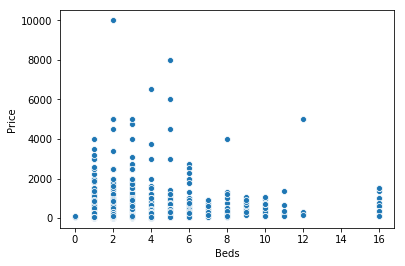

In [62]:
# Association between Beds and Price
sns.scatterplot('Beds', 'Price', data=df)
plt.show()

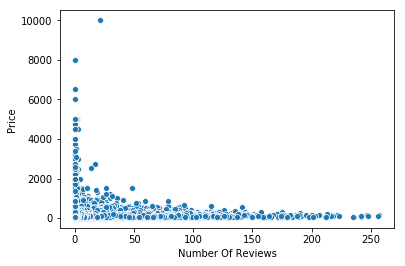

In [63]:
# Association between Number Of Reviews and Price
sns.scatterplot('Number Of Reviews', 'Price', data=df)
plt.show()

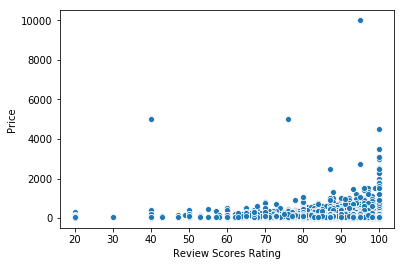

In [64]:
# Association between Review Scores Rating and Price
sns.scatterplot('Review Scores Rating', 'Price', data=df)
plt.show()